Для выполнения тестового задания требуется разработать модель, которая будет способна различать заголовки реальных и выдуманных новостей.
Для обучения модели используйте данные из файла `train.tsv`. В файле находится таблица, состоящая из двух колонок. 
В колонке title записан заголовок новости. В колонке is_fake содержатся метки: 0 – новость реальная; 1 – новость выдуманная.
Для демонстрации работы модели используйте данные тестового набора из файла `test.tsv`. В нем также есть колонка title, данные которой являются входными для вашей модели.

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dnbne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dnbne\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [115]:
# Загружаем датасет
news_d = pd.read_csv('train.tsv', sep='\t')

In [116]:
news_d.shape

(5758, 2)

In [117]:
news_d

,title,is_fake
0,Москвичу Владимиру Клутину пришёл счёт за вмеш...,1
1,Агент Кокорина назвал езду по встречке житейск...,0
2,Госдума рассмотрит возможность введения секрет...,1
3,ФАС заблокировала поставку скоростных трамваев...,0
4,Против Навального завели дело о недоносительст...,1
...,...,...
5753,Эдди Чемберс получил сотрясение мозга в бою с ...,0
5754,Правительство застроит Россию нефтепродуктопро...,0
5755,«Мне стыдно перед дедом»: новый канцлер ФРГ об...,1
5756,Туркмения в декабре начнет поставки газа в Китай,0


In [118]:
title_length = news_d.title.str.split().str.len()
title_length.describe()

count    5758.000000
mean        8.723689
std         2.810851
min         3.000000
25%         7.000000
50%         8.000000
75%        10.000000
max        37.000000
Name: title, dtype: float64

1    2879
0    2879
Name: is_fake, dtype: int64


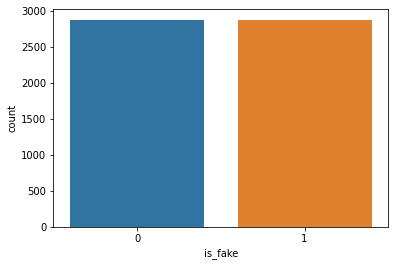

In [119]:
sns.countplot(x='is_fake', data=news_d)
print(news_d.is_fake.value_counts())

In [64]:
print(round(news_d.is_fake.value_counts(normalize=True),2)*100)

1    50.0
0    50.0
Name: is_fake, dtype: float64


In [65]:
news_d.isnull().count()

title      5758
is_fake    5758
dtype: int64

In [67]:
news_d.rename(columns = {'is_fake':'label'}, inplace = True)

In [68]:
news_d

,title,label
0,Москвичу Владимиру Клутину пришёл счёт за вмеш...,1
1,Агент Кокорина назвал езду по встречке житейск...,0
2,Госдума рассмотрит возможность введения секрет...,1
3,ФАС заблокировала поставку скоростных трамваев...,0
4,Против Навального завели дело о недоносительст...,1
...,...,...
5753,Эдди Чемберс получил сотрясение мозга в бою с ...,0
5754,Правительство застроит Россию нефтепродуктопро...,0
5755,«Мне стыдно перед дедом»: новый канцлер ФРГ об...,1
5756,Туркмения в декабре начнет поставки газа в Китай,0


Очистка данных для последующего анализа

In [69]:
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from collections import Counter

In [70]:
categorical_features = []
target_col = ['label']
text_f = ['title']

In [71]:
ps = PorterStemmer()
wnl = nltk.stem.WordNetLemmatizer()

stop_words = stopwords.words('russian')
stopwords_dict = Counter(stop_words)

# Заполняем null значениями None
def null_process(feature_df):
    for col in text_f:
        feature_df.loc[feature_df[col].isnull(), col] = "None"
    return feature_df

# Очищаем текст от неиспользуемых знаков
def clean_text(text):
    text = str(text).replace(r'http[\w:/\.]+', ' ')  # убираем urls, если такие имеются
    text = str(text).replace(r'[^\.\w\s]', ' ')  # убираем все, кроме символов и знаков препинания
    text = str(text).replace('[^ё-яЁ-Я]', ' ')
    text = str(text).replace(r'\s\s+', ' ')
    text = text.lower().strip()   
    return text

# Удаляем стоп-слова
def nltk_preprocess(text):
    text = clean_text(text)
    wordlist = re.sub(r'[^\w\s]', '', text).split()
    text = ' '.join([wnl.lemmatize(word) for word in wordlist if word not in stopwords_dict])
    return  text

In [72]:
df = null_process(news_d)
df['title'] = df.title.apply(nltk_preprocess)

In [75]:
news_d

,title,label
0,москвичу владимиру клутину пришёл счёт вмешате...,1
1,агент кокорина назвал езду встречке житейской ...,0
2,госдума рассмотрит возможность введения секрет...,1
3,фас заблокировала поставку скоростных трамваев...,0
4,против навального завели дело недоносительстве...,1
...,...,...
5753,эдди чемберс получил сотрясение мозга бою кличко,0
5754,правительство застроит россию нефтепродуктопро...,0
5755,стыдно дедом новый канцлер фрг обратился перво...,1
5756,туркмения декабре начнет поставки газа китай,0


In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

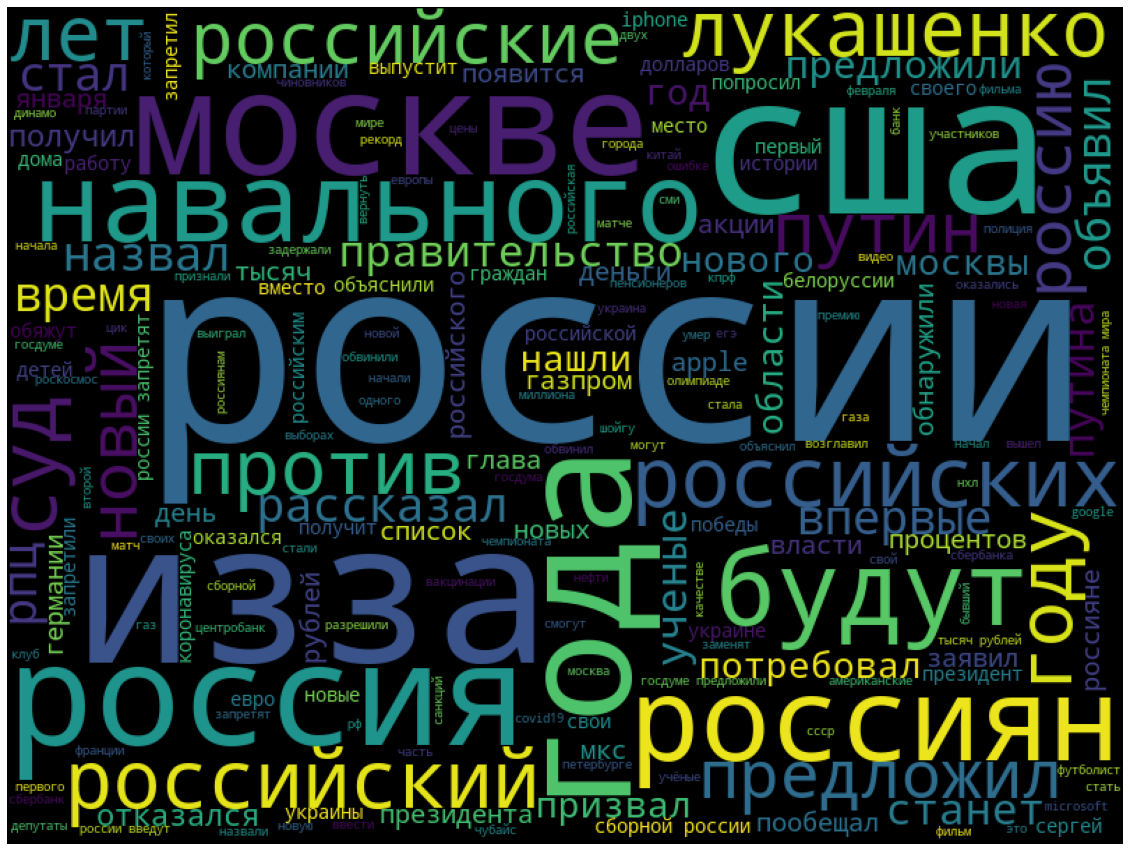

In [77]:
# Создаем облаков слов
wordcloud = WordCloud( background_color='black', width=800, height=600)
title_cloud = wordcloud.generate(' '.join(news_d['title']))
# Отрисовываем облако слов
plt.figure(figsize=(20,30))
plt.imshow(title_cloud)
plt.axis('off')
plt.show()

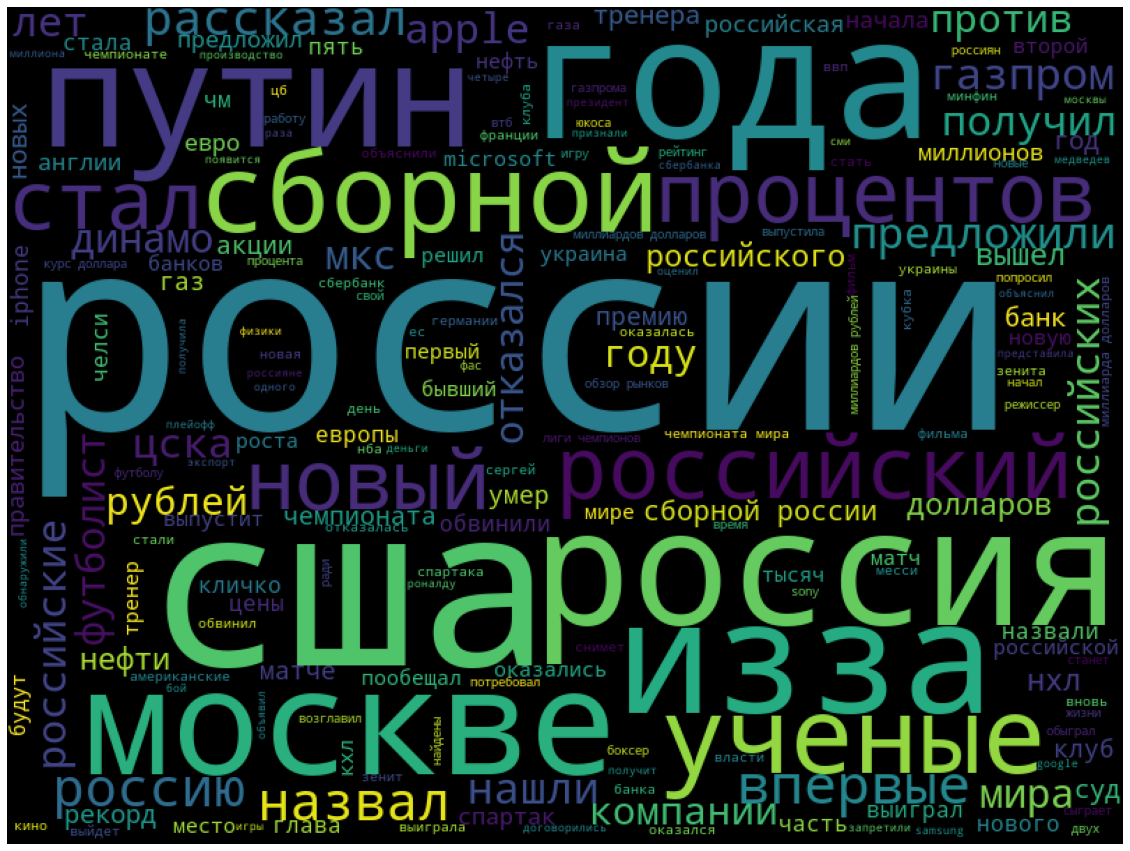

In [78]:
# Облако слов для достоверных новостей
true_n = ' '.join(news_d[news_d['label']==0]['title']) 
wc = wordcloud.generate(true_n)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

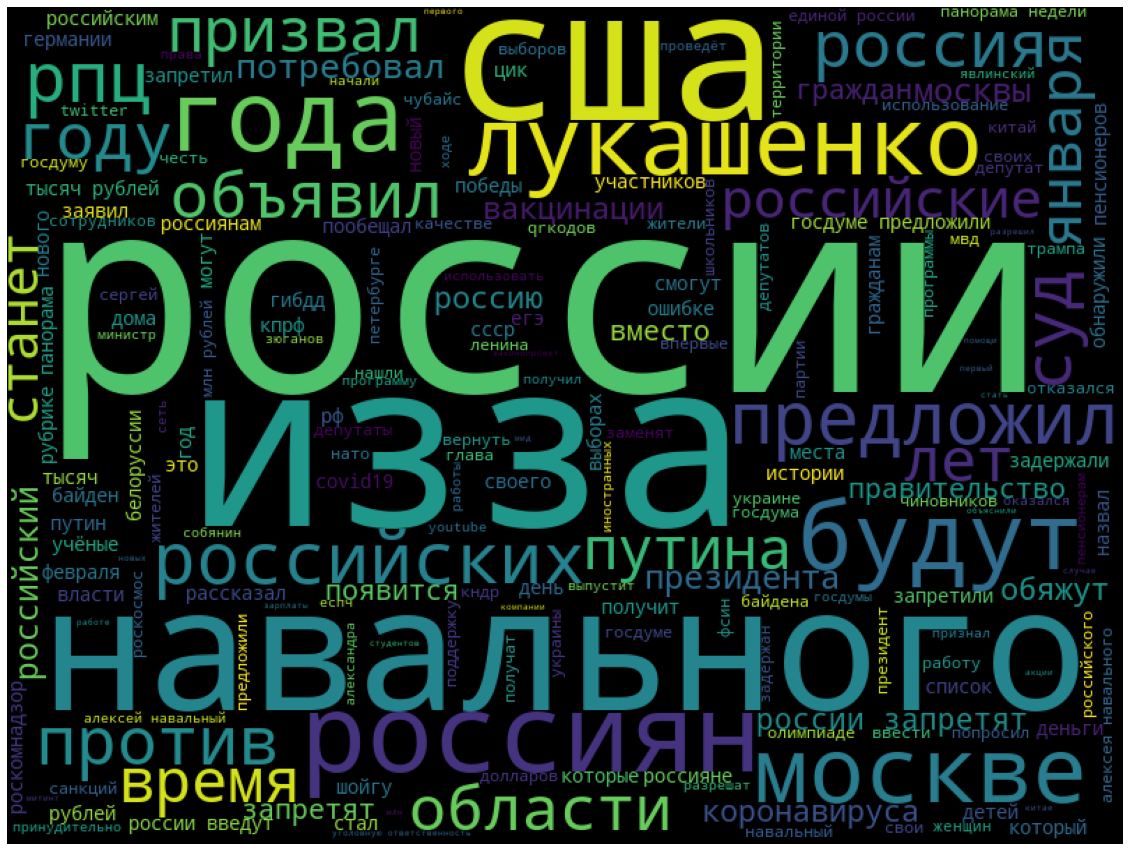

In [79]:
# Облако слов для недостоверных новостей
fake_n = ' '.join(news_d[news_d['label']==1]['title'])
wc= wordcloud.generate(fake_n)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

Комбинация 2 наиболее часто встречаемых слов - Bigram

In [120]:
def plot_top_ngrams(corpus, title, ylabel, xlabel='Число появлений', n=2):
  true_b = (pd.Series(nltk.ngrams(corpus.split(), n)).value_counts())[:20]
  true_b.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
  plt.title(title)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.show()

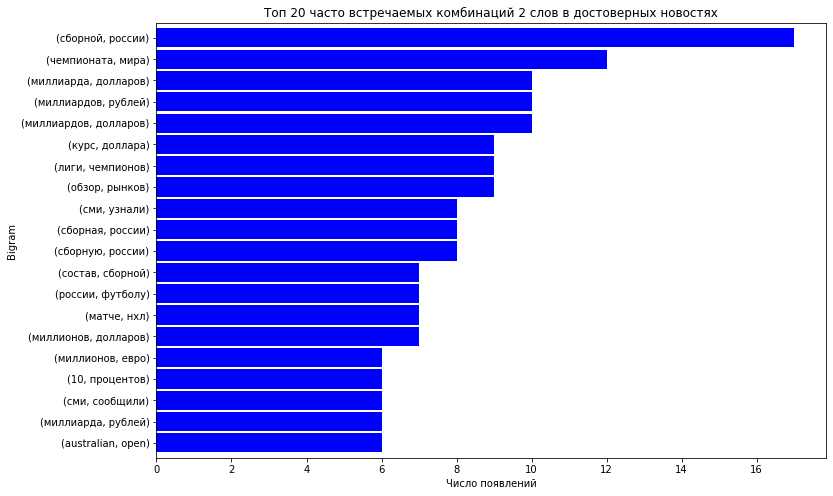

In [121]:
plot_top_ngrams(true_n, 'Топ 20 часто встречаемых комбинаций 2 слов в достоверных новостях', 'Bigram', n=2)

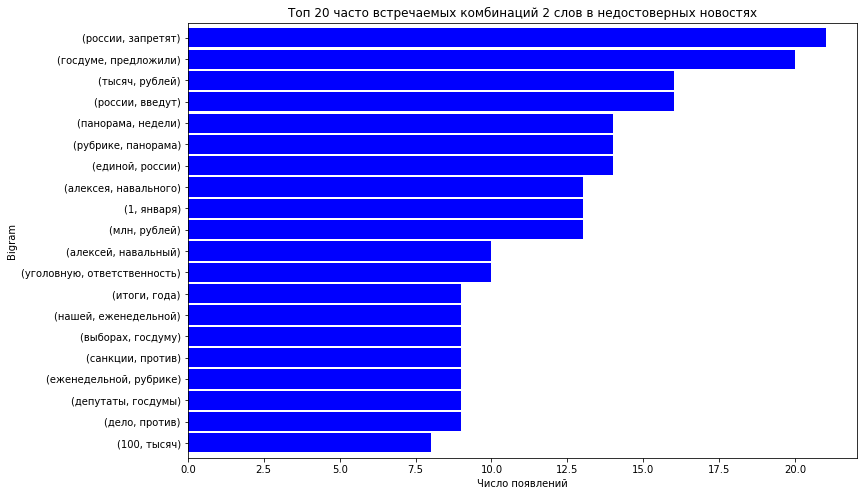

In [122]:
plot_top_ngrams(fake_n, 'Топ 20 часто встречаемых комбинаций 2 слов в недостоверных новостях', 'Bigram', n=2)

Комбинация 3 наиболее часто встречаемых слов - Trigram

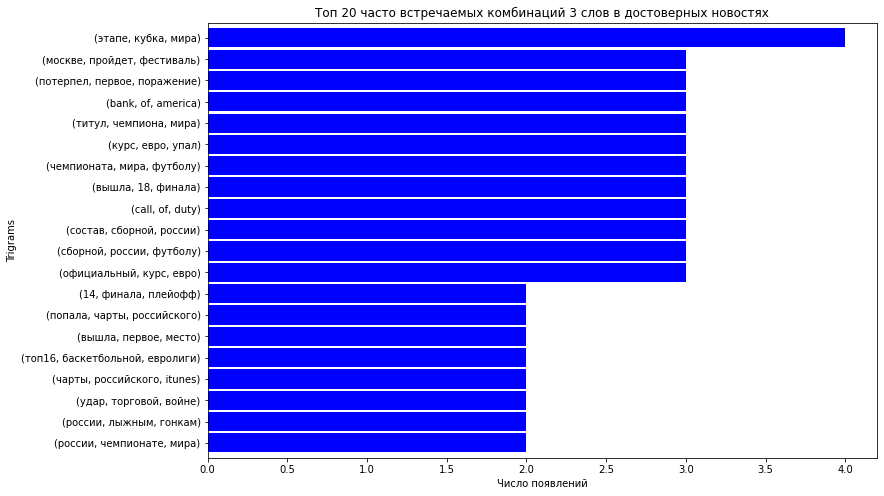

In [127]:
plot_top_ngrams(true_n, 'Топ 20 часто встречаемых комбинаций 3 слов в достоверных новостях', 'Trigrams', n=3)

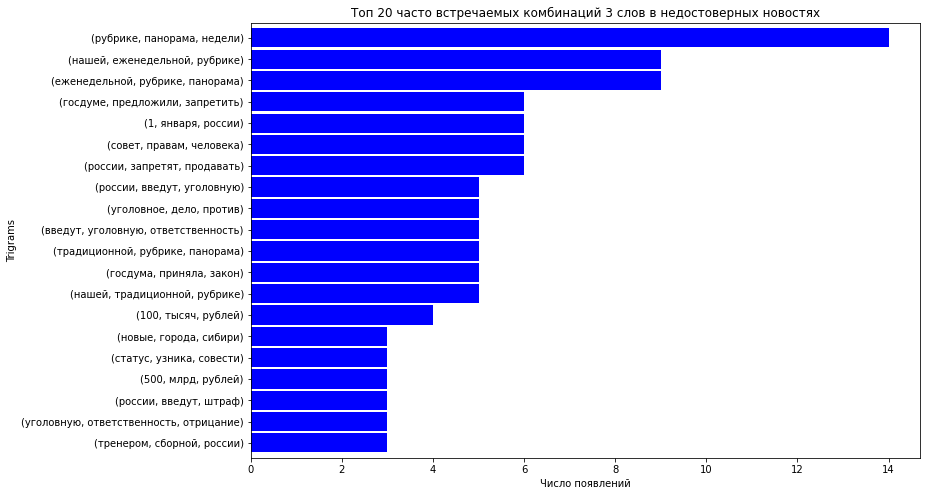

In [124]:
plot_top_ngrams(fake_n, 'Топ 20 часто встречаемых комбинаций 3 слов в недостоверных новостях', 'Trigrams', n=3)

Создаем классификатор на основе модели BERT

In [85]:
import torch
from transformers.file_utils import is_tf_available, is_torch_available
from transformers import BertTokenizerFast, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import numpy as np
from sklearn.model_selection import train_test_split
import random

C:\Programs\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [86]:
def set_seed(seed: int):
    random.seed(seed)
    np.random.seed(seed)
    if is_torch_available():
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    if is_tf_available():
        import tensorflow as tf

        tf.random.set_seed(seed)

set_seed(1)

In [87]:
model_name = 'bert-base-uncased'
max_length = 512

In [88]:
# Загружаем токенизатор
tokenizer = BertTokenizerFast.from_pretrained(model_name, do_lower_case=True)

Подготовка данных к анализу

In [89]:
def prepare_data(news_d, test_size=0.2, include_title=True):
  titles = []
  labels  = []
  for i in range(len(news_d)):
    title = news_d['title'].iloc[i]
    label = news_d['label'].iloc[i]
    if include_title:
      title = news_d['title'].iloc[i] + ' - ' + title
    if title and label in [0, 1]:
      titles.append(title)
      labels.append(label)
  return train_test_split(titles, labels, test_size=test_size)

train_titles, valid_titles, train_labels, valid_labels = prepare_data(news_d)

In [90]:
print(len(train_titles), len(train_labels))
print(len(valid_titles), len(valid_labels))

4606 4606
1152 1152


Токенизируем датасет

In [91]:
train_encodings = tokenizer(train_titles, truncation=True, padding=True, max_length=max_length)
valid_encodings = tokenizer(valid_titles, truncation=True, padding=True, max_length=max_length)

In [92]:
class NewsGroupsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item['labels'] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

# Преобразуем токенизированный датасет в torch-датасет
train_dataset = NewsGroupsDataset(train_encodings, train_labels)
valid_dataset = NewsGroupsDataset(valid_encodings, valid_labels)

In [93]:
# Загружаем модель
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [94]:
from sklearn.metrics import accuracy_score

def compute_metrics(pred):
  labels  = pred.label_ids
  preds = pred.predictions.argmax(-1)
  # Вычисление точности
  acc = accuracy_score(labels, preds)
  return {
      'accuracy': acc,
  }

In [95]:
training_args = TrainingArguments(
    output_dir='./results',          
    num_train_epochs=1,             
    per_device_train_batch_size=10,  
    per_device_eval_batch_size=20,   
    warmup_steps=100,                
    logging_dir='./logs',            
    load_best_model_at_end=True,     
    logging_steps=200,               
    save_steps=200,
    evaluation_strategy='steps',     
)

In [96]:
trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=valid_dataset,          
    compute_metrics=compute_metrics,     
)

In [98]:
# Обучение модели
trainer.train()

***** Running training *****
  Num examples = 4606
  Num Epochs = 1
  Instantaneous batch size per device = 10
  Total train batch size (w. parallel, distributed & accumulation) = 10
  Gradient Accumulation steps = 1
  Total optimization steps = 461
 43%|████▎     | 200/461 [02:53<03:44,  1.16it/s]***** Running Evaluation *****
  Num examples = 1152
  Batch size = 20


{'loss': 0.5392, 'learning_rate': 0.0, 'epoch': 0.43}


                                                 
 43%|████▎     | 200/461 [03:40<03:44,  1.16it/s]Saving model checkpoint to ./results\checkpoint-200
Configuration saved in ./results\checkpoint-200\config.json


{'eval_loss': 0.5231666564941406, 'eval_accuracy': 0.7482638888888888, 'eval_runtime': 47.0122, 'eval_samples_per_second': 24.504, 'eval_steps_per_second': 1.234, 'epoch': 0.43}


Model weights saved in ./results\checkpoint-200\pytorch_model.bin
 87%|████████▋ | 400/461 [06:35<00:52,  1.16it/s]  ***** Running Evaluation *****
  Num examples = 1152
  Batch size = 20


{'loss': 0.5438, 'learning_rate': 0.0, 'epoch': 0.87}


                                                 
 87%|████████▋ | 400/461 [07:23<00:52,  1.16it/s]Saving model checkpoint to ./results\checkpoint-400
Configuration saved in ./results\checkpoint-400\config.json


{'eval_loss': 0.5231666564941406, 'eval_accuracy': 0.7482638888888888, 'eval_runtime': 47.6032, 'eval_samples_per_second': 24.2, 'eval_steps_per_second': 1.218, 'epoch': 0.87}


Model weights saved in ./results\checkpoint-400\pytorch_model.bin
100%|██████████| 461/461 [08:17<00:00,  1.31it/s]

Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from ./results\checkpoint-200 (score: 0.5231666564941406).
100%|██████████| 461/461 [08:17<00:00,  1.08s/it]

{'train_runtime': 497.997, 'train_samples_per_second': 9.249, 'train_steps_per_second': 0.926, 'train_loss': 0.5419186407987052, 'epoch': 1.0}


TrainOutput(global_step=461, training_loss=0.5419186407987052, metrics={'train_runtime': 497.997, 'train_samples_per_second': 9.249, 'train_steps_per_second': 0.926, 'train_loss': 0.5419186407987052, 'epoch': 1.0})

Оценка модели

In [99]:
# Оцениваем нашу модель после обучения
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 1152
  Batch size = 20
100%|██████████| 58/58 [00:46<00:00,  1.24it/s]


{'eval_loss': 0.5231666564941406,
 'eval_accuracy': 0.7482638888888888,
 'eval_runtime': 47.6549,
 'eval_samples_per_second': 24.174,
 'eval_steps_per_second': 1.217,
 'epoch': 1.0}

In [100]:
# Сохраняем модель и токенизатор
model_path = 'fake-news-bert-base-uncased'
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

Configuration saved in fake-news-bert-base-uncased\config.json
Model weights saved in fake-news-bert-base-uncased\pytorch_model.bin
tokenizer config file saved in fake-news-bert-base-uncased\tokenizer_config.json
Special tokens file saved in fake-news-bert-base-uncased\special_tokens_map.json


('fake-news-bert-base-uncased\\tokenizer_config.json',
 'fake-news-bert-base-uncased\\special_tokens_map.json',
 'fake-news-bert-base-uncased\\vocab.txt',
 'fake-news-bert-base-uncased\\added_tokens.json',
 'fake-news-bert-base-uncased\\tokenizer.json')

In [101]:
def get_prediction(text, convert_to_label=False):
    inputs = tokenizer(text, padding=True, truncation=True, max_length=max_length, return_tensors='pt').to('cuda')
    outputs = model(**inputs)
    probs = outputs[0].softmax(1)
    d = {
        0: 'достоверно',
        1: 'недостоверно'
    }
    if convert_to_label:
      return d[int(probs.argmax())]
    else:
      return int(probs.argmax())

Используем тестовый датасет

In [102]:
test_df = pd.read_csv('test.tsv', sep='\t')

In [103]:
test_df

,title,is_fake
0,Роскомнадзор представил реестр сочетаний цвето...,0
1,Ночью под Минском на президентской горе Белара...,0
2,Бывший спичрайтер Юрия Лозы рассказал о трудно...,0
3,"Сельская церковь, собравшая рекордно низкое ко...",0
4,Акции Google рухнули после объявления о переза...,0
...,...,...
995,Прокуратура заподозрила Явлинского в авторитар...,0
996,В День Победы стратегические ракетоносцы Ту-16...,0
997,СК возбудил дело против авиакомпании «Победа» ...,0
998,Криптомонетный двор Туркменистана выпустил юби...,0


In [104]:
# Создаем предсказания для тестового датасета
test_df['label'] = test_df['title'].apply(get_prediction)
# Сохраняем предсказания
final_df = test_df[['title', 'label']]
final_df=final_df.rename(columns={'label':'is_fake'})
final_df.to_csv('predictions.tsv', index=False, sep='\t')

In [105]:
pred_d = pd.read_csv('predictions.tsv', sep='\t')

In [108]:
pred_d

,title,is_fake
0,Роскомнадзор представил реестр сочетаний цвето...,0
1,Ночью под Минском на президентской горе Белара...,0
2,Бывший спичрайтер Юрия Лозы рассказал о трудно...,0
3,"Сельская церковь, собравшая рекордно низкое ко...",0
4,Акции Google рухнули после объявления о переза...,0
...,...,...
995,Прокуратура заподозрила Явлинского в авторитар...,0
996,В День Победы стратегические ракетоносцы Ту-16...,0
997,СК возбудил дело против авиакомпании «Победа» ...,0
998,Криптомонетный двор Туркменистана выпустил юби...,0


0    995
1      5
Name: is_fake, dtype: int64


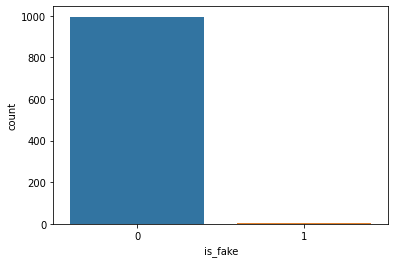

In [126]:
sns.countplot(x='is_fake', data=pred_d)
print(pred_d.is_fake.value_counts())